In [1]:
import lightkurve as lk

In [3]:
result = lk.search_targetpixelfile('TIC 371234684', mission='TESS')

In [4]:
result

#,observation,target_name,productFilename,distance
0,TESS Sector 20,371234684,tess2019357164649-s0020-0000000371234684-0165-s_tp.fits,0.0


In [5]:
tpf = result.download()

In [6]:
exoplanet = {'tic': tpf.targetid,
             'mission': tpf.mission,
             'sector': tpf.sector,
             'camera': tpf.camera}

In [7]:
exoplanet['tic']

371234684

In [9]:
for k, v in exoplanet.items():
    print(f'{k}: {v}')

tic: 371234684
mission: TESS
sector: 20
camera: 1


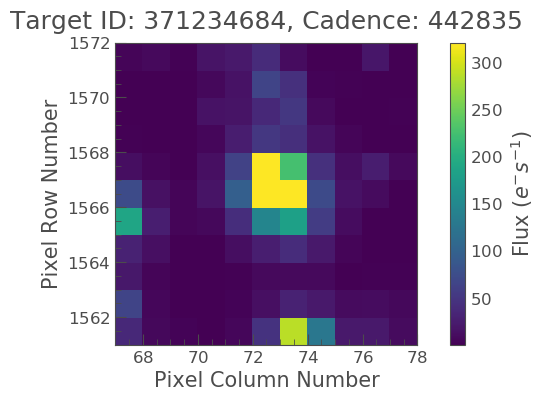

In [10]:
tpf.plot()

In [33]:
lc = tpf.to_lightcurve().remove_outliers()

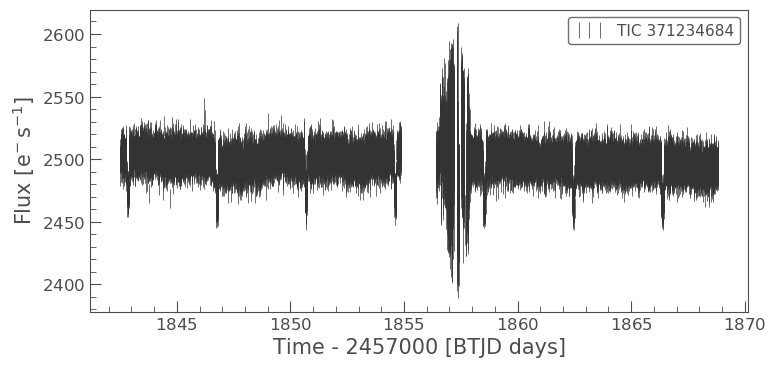

In [34]:
lc.errorbar()

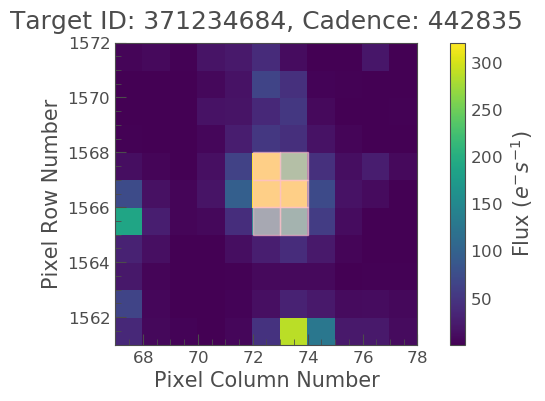

In [20]:
# create our own aperture
aperture_mask = tpf.create_threshold_mask(threshold=10)
tpf.plot(aperture_mask=aperture_mask)

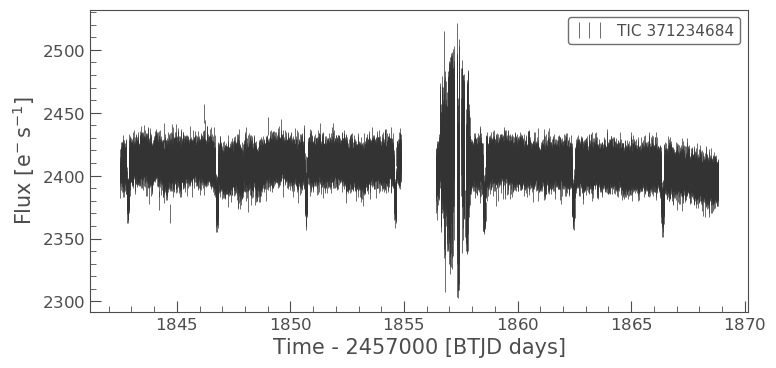

In [37]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).remove_outliers()
lc.errorbar()

In [23]:
lc.time.shape

(17633,)

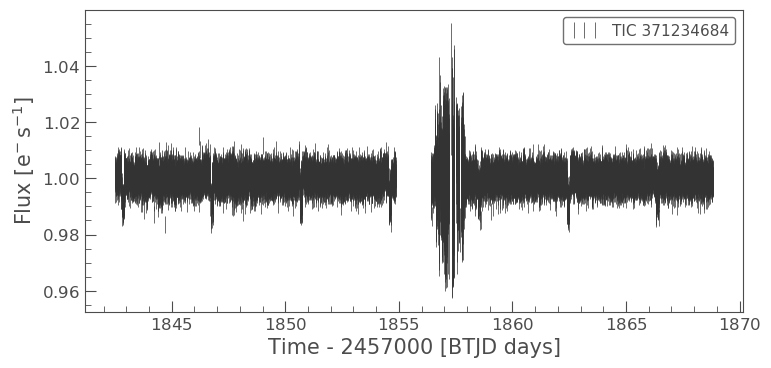

In [43]:
flat_lc = lc.flatten(window_length=881)
flat_lc.errorbar()

In [40]:
folded_lc = flat_lc.fold(period=3.923, t0=1857.5)

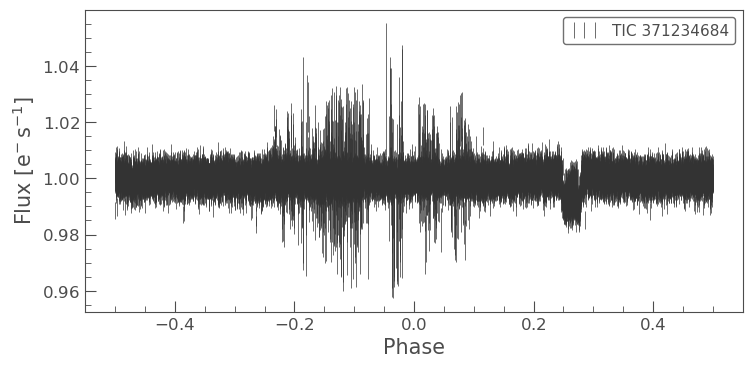

In [42]:
folded_lc.errorbar()

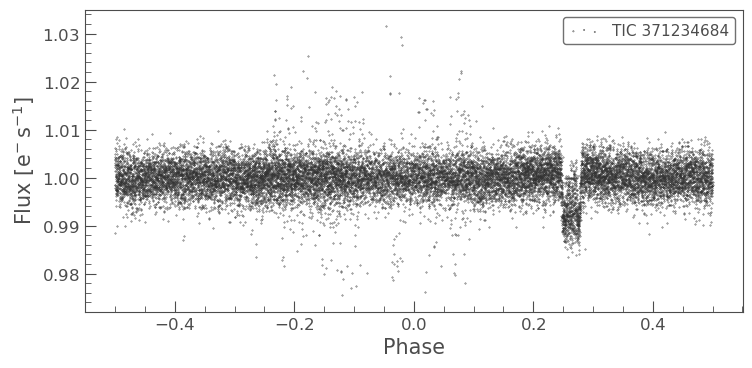

In [44]:
scatter_lc = folded_lc.scatter(s=0.1)